In [22]:
import numpy as np
import os
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
from xgboost import plot_importance,plot_tree
import xgboost as xgb

基于XGBoost原生接口的分类问题

In [23]:
iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=960411)

In [24]:
# 训练算法参数设置
params = {
    # 通用参数
    'booster':'gbtree', # 弱学习器，gbtree gblinear
    'nthread':4,  # 运行时的线程数
    'silent':0,  # 打印运行时的信息
    'num_feature':4,  # boosting过程中使用的特征维数
    'seed':1000,  # 随机种子
    # 任务参数
    'objective':'multi:softmax',
    'num_class':3,# 类别数
    # boosting参数
    'gamma':0.1,  # 叶子节点进行划分时需要损失函数减小的最小阈值
    'max_depth':6,  # 最大深度
    'lambda':2,  # 正则化权重
    'subsample':0.7,  # 训练模型的样本占总样本的比例，用于防止过拟合
    'colsample_bytree':0.7,  # 建立树时 对特征进行采样的比例
    'min_child_weight':3, # 叶子节点继续划分的最小的样本权重和
    'eta':0.1,  # 加法模型中使用的收缩步长
}
# plst = params.items()  # dict_items‘ object has no attribute ‘copy‘
plst = list(params.items())

In [25]:
# 数据集格式转换
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test)

In [26]:
# 迭代次数，对于分类分体，每个类别的迭代次数，总的基学习器 = 迭代次数*类别个数
num_rounds = 50
model = xgb.train(plst,dtrain,num_rounds)

[19:42:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [27]:
# 对测试集进行预测
y_pred = model.predict(dtest)

In [28]:
# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print('准确率为：%.2f%%'%(accuracy*100.0))


准确率为：96.67%


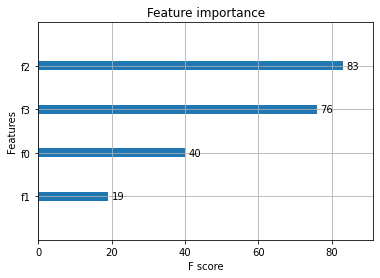

In [29]:
# 显示重要特征
plot_importance(model)
plt.show()


<AxesSubplot:>

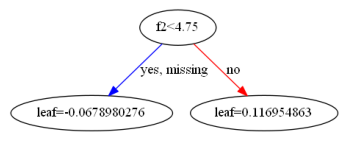

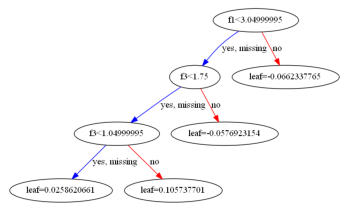

In [30]:
# 可视化树的生成情况，num_trees是树的索引
# conda install graphviz python-graphviz
plot_tree(model,num_trees=5)
plot_tree(model,num_trees=1)

In [31]:
# 将基学习器输出
model.dump_model('model.txt')


2.基于XGBoost原生接口的回归问题

In [43]:
boston = load_boston()
X, y = boston.data, boston.target
feature_name = boston.feature_names
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [44]:
params = {
    'booster':'gbtree',
    'objective':'reg:gamma',  # gamma回归
    'gamma':0.1,
    'max_depth':5,
    'lambda':3,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'silent':1,
    'eta':0.1,
    'seed':1000,
    'nthread':4,
}
plst = list(params.items())

In [45]:
# feature_name
# X_trian
# y_train
dtrain = xgb.DMatrix(X_train,y_train,feature_names=feature_name)
dtest = xgb.DMatrix(X_test,feature_names=feature_name)
#
num_rounds = 30
model = xgb.train(plst, dtrain, num_rounds)


[19:55:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




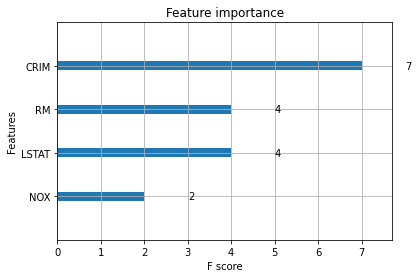

In [46]:
y_pred = model.predict(dtest)

plot_importance(model,importance_type='weight')
plt.show()

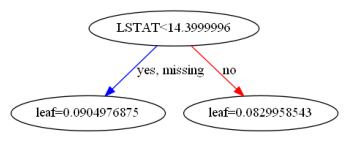

In [47]:
plot_tree(model,num_trees=17)

model.dump_model('model2.txt')